## 데이터 다운로드 및 분석

In [31]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [32]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


/tmp/ipykernel_31/2284205290.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


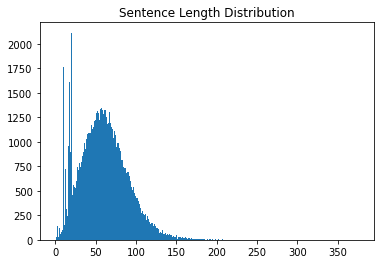

In [33]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

1) 길이 1 짜리 문장은 도대체 어떻게 생겨먹었지?

2) 앞에 치솟는 임의의 구간은 뭐지? 유의미한 데이터가 담겨있는 부분인가?

3) 어디서부터 어디까지 잘라서 쓰지?

In [34]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [35]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [36]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


/tmp/ipykernel_31/390535405.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


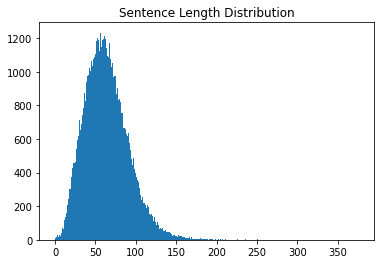

In [37]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

/tmp/ipykernel_31/1483434014.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


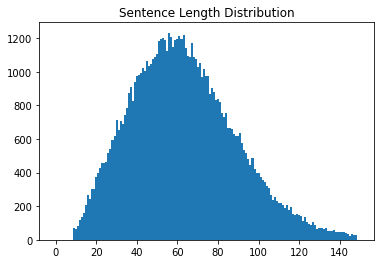

In [38]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

## 공백 기반 토큰화

In [127]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre')

    return tensor, tokenizer

In [40]:
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [41]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [42]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


## 형태소 기반 토큰화

In [43]:
from konlpy.tag import Mecab

mecab = Mecab()

In [44]:
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [45]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


In [46]:
for idx, word in enumerate(mecab_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : .
1 : 다
2 : 이
3 : 는
4 : 을
5 : 의
6 : 에
7 : 은
8 : 를
9 : 하
10 : 했
11 : 고


* tokenizer.sequences_to_texts() 함수를 사용하여 Decoding
* tokenizer.index_word 를 사용하여 Decoding

In [47]:
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

미국 식품 의 약국 식품 부 의 데이비드 애치슨 박사 는 모두 893 명 이 살모넬라균 에 감염 됐으며 이 들 중 107 명 이 입원 했 다고 밝혔 다 .


In [48]:
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

미국 식품 의 약국 식품 부 의 데이비드 애치슨 박사 는 모두 893 명 이 살모넬라균 에 감염 됐으며 이 들 중 107 명 이 입원 했 다고 밝혔 다 . 


# 프로젝트: SentencePiece 사용하기


In [49]:
#라이브러리 버전 확인
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.6.0
1.22.2
3.4.3
0.5.2


In [50]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 376816 Mar 22 02:18 korean_spm.model
-rw-r--r-- 1 root root 146213 Mar 22 02:18 korean_spm.vocab


In [51]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


In [52]:
len(filtered_corpus)

76908

* 1) 매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list 를 전달합니다.

* 2) 생성된 vocab 파일을 읽어와 { <word> : <idx> } 형태를 가지는 word_index 사전과 { <idx> : <word>} 형태를 가지는 index_word 사전을 생성하고 함께 반환합니다.

* 3) 리턴값인 tensor 는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장입니다. 바로 학습에 사용할 수 있게 Padding



In [53]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [54]:
my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1956 5665    5    4 7975 1990    3    0    0    0    0    0    0    0]
 [ 107 1641  101    4    0  417   11    4   14    0 1976    3    3    3]]


# 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기

In [55]:
import pandas as pd
import urllib.request

In [56]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt')

In [57]:
data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [58]:
#중복 데이터 확인
data[data.duplicated(subset='document', keep=False)]

,id,document,label
8,7477618,굿,1
11,640794,재밌다,1
69,5784847,재미있어요,1
86,10248728,뀰잼이다뀰잼이라구여,1
120,4083134,쵝오,1
...,...,...,...
199932,2334732,지루함...,0
199939,2105796,bad,0
199944,2100743,재미없다...,0
199946,735755,에혀,0


### 결측치 및 중복데이터 제거

In [59]:
data['document'].isnull().sum()

8

In [60]:
data['label'].isnull().sum()

0

In [61]:
len(data['document'])

200000

In [62]:
#중복제거 
data = data.drop_duplicates(['document'])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194544 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        194544 non-null  int64 
 1   document  194543 non-null  object
 2   label     194544 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.9+ MB


In [64]:
data = data.dropna(axis=0)

In [65]:
len(data['document'])

194543

In [66]:
cleaned_corpus = data['document']

In [67]:
len(cleaned_corpus)

194543

### 정규표현식을 이용한 전처리

In [68]:
import re
def preprocess_sentence(sentence):
  
  # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
  # 예를 들어서 "I am a student." => "I am a student ."와 같이
  # student와 온점 사이에 거리를 만듭니다.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)

  # (가-힣, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
  sentence = re.sub(r"[^가-힣?.!,]+", " ", sentence)
  sentence = sentence.strip()
  return sentence


In [69]:
re_corpus = []
for sentence in cleaned_corpus:
    re_corpus.append(preprocess_sentence(sentence))
    


In [70]:
re_corpus[:10]

['어릴때보고 지금다시봐도 재밌어요',
 '디자인을 배우는 학생으로 , 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데 . 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다 .',
 '폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 . . 최고 .',
 '와 . . 연기가 진짜 개쩔구나 . . 지루할거라고 생각했는데 몰입해서 봤다 . . 그래 이런게 진짜 영화지',
 '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화 .',
 '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화',
 '완전 감동입니다 다시봐도 감동',
 '개들의 전쟁 나오나요 ? 나오면 빠로 보고 싶음',
 '굿',
 '바보가 아니라 병 쉰 인듯']

In [71]:
data['re_document'] = re_corpus
data = data.drop(['document'],axis=1)
data

,id,label,re_document
0,8112052,1,어릴때보고 지금다시봐도 재밌어요
1,8132799,1,"디자인을 배우는 학생으로 , 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화..."
2,4655635,1,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 . . 최고 .
3,9251303,1,와 . . 연기가 진짜 개쩔구나 . . 지루할거라고 생각했는데 몰입해서 봤다 . ....
4,10067386,1,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화 .
...,...,...,...
199995,8963373,0,포켓 몬스터 짜가
199996,3302770,0,쓰 . 레 . 기
199997,5458175,0,완전 사이코영화 . 마지막은 더욱더 이 영화의질을 떨어트린다 .
199998,6908648,0,왜난 재미없었지 라따뚜이 보고나서 스머프 봐서 그런가


문장의 최단 길이: 0
문장의 최장 길이: 279
문장의 평균 길이: 36


/tmp/ipykernel_31/2463085726.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


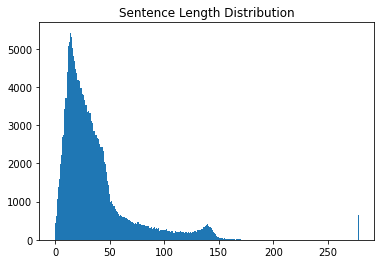

In [72]:
import matplotlib.pyplot as plt

min_len = 999
max_len = 0
sum_len = 0

for i in re_corpus:
    length = len(i)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(re_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in re_corpus:
    sentence_length[len(sen)-1] += 1
    

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

#### 분포를 체크해본후, 문장 길이가 1 또는2인 문장을 확인해보자. 또한, 분포의 끝에 튄 데이터를 확인해보자.

In [73]:
check_sentence_with_length(re_corpus, 1)

굿
핡
쨩
휴
짱
시
긋
.
!
짱
갑
.
퀼
넌
짱
점
.
올
헷
!
,
!
!
짱
굿
!
.
.
굳
잼
점
굳
!
.
!
굿
!
?
짱
,
켠
구
!
애
켘
!
흠
오
!
찜
굿
?
짱
!
렇
!
,
.
굿
!
젬
긋
굿
해
점
등
,
!
!
짱
.
.
호
굿
자
짱
!
굿
.
짱
음
!
!
!
굿
헐
굿
굳
캬
.
!
,
.
!
.
린
굳
오
?
.
.


In [74]:
check_sentence_with_length(re_corpus, 2)

쵝오
감동
최고
좋아
적당
흐흐
개쩜
굳뜨
빠다
좋다
결말
섬뜩
대박
잼슴
굳굳
윤하
유쾌
까까
감동
잼남
박수
간지
수작
각키
졸잼
쏘우
명작
대작
최고
잼네
맞아
완벽
오우
굿굿
굿잡
와우
쩐다
신고
좋네
미투
감동
팬심
최고
감동
후훗
걸작
재미
잼잼
나두
예뻐
만점
최고
웃김
최고
오호
람보
설리
좋너
환상
의읭
갱호
감동
원작
좋음
꿀잼
하하
감동
좋음
조앙
멋져
매력
좋다
개박
조음
추천
신고
탁월
조아
쩔어
피식
굳밤
감독
잼슴
가슴
재밋
잼씀
잼넹
진리
붉다
눈물
웃김
안다
이브
최고
오오
아낰
막장
덜덜
좋아
그냥
잼따


In [75]:
# 튄 부분의 문장 수 확인
sentence_length[max_len-1]

654

In [76]:
check_sentence_with_length(re_corpus, 279)

후 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


**문장길이가 1또는 2인 경우, 큰 의미가 없는 문장임을 확인할 수 있다. 따라서 minlen을3으로 두고, maxlend은 대부분의 문장을 포함하는 120으로 설정하고 분석을 진행해보자.** 

In [77]:
length_list= [len(raw) for raw in re_corpus]

In [78]:

maxlen = 120
minlen = 3
count = 0
for num in length_list:
    if minlen<= num and num <= maxlen:
        count +=1
        
print(count/len(length_list)*100)

95.03246068992459


**minlen=3 , maxlen = 120으로 설정시 95%의 문장이 포함됨을 알 수 있다.**

/tmp/ipykernel_31/628378031.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


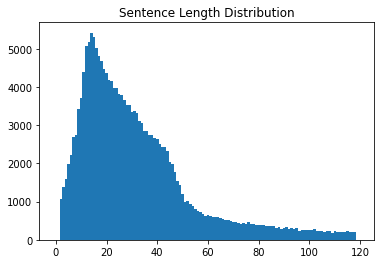

In [79]:
max_len = 120
min_len = 3

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in re_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [80]:
review = []

for s in data['re_document']:
    if (len(s) < max_len) & (len(s) >= min_len):
        review.append(s)
        
        

        
    

In [81]:
review = pd.DataFrame(review)

In [82]:
review = review.rename(columns={0:'re_document'})

In [83]:
review

,re_document
0,어릴때보고 지금다시봐도 재밌어요
1,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 . . 최고 .
2,와 . . 연기가 진짜 개쩔구나 . . 지루할거라고 생각했는데 몰입해서 봤다 . ....
3,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화 .
4,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화
...,...
184690,포켓 몬스터 짜가
184691,쓰 . 레 . 기
184692,완전 사이코영화 . 마지막은 더욱더 이 영화의질을 떨어트린다 .
184693,왜난 재미없었지 라따뚜이 보고나서 스머프 봐서 그런가


In [84]:
review = review.drop_duplicates(['re_document'])

In [85]:
data = data.drop_duplicates(['re_document'])

In [86]:
train = pd.merge(data,review ,how='inner',on='re_document')

**join하는 과정에서 자꾸 데이터의 raw가 늘어나는 문제가 발생했다. 확인해보니, 기존에 중복을 제거했음에도 불구하고 정규표현식을 이용한 전처리를 하니 다시 중복되는 데이터가 있었던것 같다. 따라서 기존 데이터와 새로 만든 데이터의 중복을 제거하고 join을 하니 문제가 해결됐다.**

In [87]:
train

,id,label,re_document
0,8112052,1,어릴때보고 지금다시봐도 재밌어요
1,4655635,1,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 . . 최고 .
2,9251303,1,와 . . 연기가 진짜 개쩔구나 . . 지루할거라고 생각했는데 몰입해서 봤다 . ....
3,10067386,1,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화 .
4,2190435,1,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화
...,...,...,...
183387,4834376,0,개연성이 없어요 . . 별루다 . . .
183388,8963373,0,포켓 몬스터 짜가
183389,5458175,0,완전 사이코영화 . 마지막은 더욱더 이 영화의질을 떨어트린다 .
183390,6908648,0,왜난 재미없었지 라따뚜이 보고나서 스머프 봐서 그런가


In [88]:
#x,y data분리
review = train['re_document']
label = train['label']

In [89]:
len(label)

183392

In [90]:
len(review)

183392

## SentencePiece에 적용

**일단, sentencepiece의 입력으로 사용하기 위해 전처리된 문장들을 txt파일로 저장해준다.**

In [91]:
with open('review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(review))

In [92]:
#vocab_size= 10000
spm.SentencePieceTrainer.Train(
    '--input=review.txt --model_prefix=naver --vocab_size=10000')

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=review.txt --model_prefix=naver --vocab_size=10000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: review.txt
  input_format: 
  model_prefix: naver
  model_type: UNIGRAM
  vocab_size: 10000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_

### 패딩

아까는 문장 길이 분포를 살펴보았고, 이번엔 토큰화된 토큰의 길이를 살펴본 후, 패딩 전 maxlen을 결정해보자.

In [93]:
s = spm.SentencePieceProcessor()
s.Load('naver.model')

tokens = []

for sen in review:
    tokens.append(s.EncodeAsIds(sen))

토큰 수 평균 :  14.593242889548073
토큰 수 최대 :  95
토큰 수 표준편차:  10.292544505666896


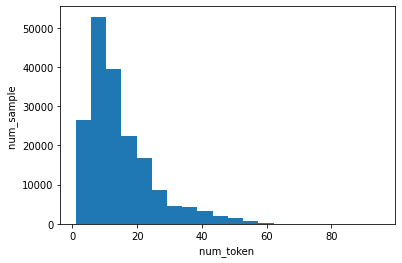

In [94]:
import matplotlib.pyplot as plt

num_token= [len(tok) for tok in tokens]
num_token = np.array(num_token)

print('토큰 수 평균 : ', np.mean(num_token))
print('토큰 수 최대 : ', np.max(num_token))
print('토큰 수 표준편차: ',np.std(num_token))
plt.hist([len(tok) for tok in tokens],bins=20)
plt.xlabel('num_token ')
plt.ylabel('num_sample ')
plt.show()

In [95]:
#임의로 40으로 지정
max_token = 40
MAX_LENGTH = int(max_token)
print('pad_sequences maxlen : ', MAX_LENGTH)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_token < max_token) / len(num_token)))

pad_sequences maxlen :  40
전체 문장의 0.961197871226662%가 maxlen 설정값 이내에 포함됩니다. 


#### token 수를 40으로 지정하니 전체 문장의 96%가 포함된다. max_token을 40으로 지정하고 패딩을 진행해보자.

In [96]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./naver.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre', maxlen=MAX_LENGTH)

    return tensor, word_index, index_word

In [97]:
my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0  414 2545   14 1115 2248 9998]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0 1045
  1932    4    0  500   12    4   16 9926  964 9998 9998 9998]]


In [98]:
for i in range(10):
    print(f"{i} : {word_index[i]}")

0 : <unk>
1 : <s>
2 : </s>
3 : ▁.
4 : ▁
5 : ▁!
6 : ▁영화
7 : 이
8 : ▁,
9 : 의


**sentencePiece의 학습을 마쳤으니, 리뷰 데이터를 tensor로 변환해보자.**

In [99]:
tensor, word_index, index_word = sp_tokenize(s, review)

In [100]:
tensor[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 1140,  154,  185, 1689,  778,  501], dtype=int32)

In [101]:
review[0]

'어릴때보고 지금다시봐도 재밌어요'

In [102]:
tokensIDs = s.EncodeAsIds('어릴때보고 지금다시봐도 재밌어요')
print(tokensIDs)

[1140, 154, 185, 1689, 778, 501]


## 모델 구성

In [103]:
import tensorflow as tf
#LSTM 레이어 사용
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

vocab_size = 10000 #사용할 단어사전 크기
embedding_dim = 100 #임베딩레이어 차원 수 


model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim))
model.add(tf.keras.layers.LSTM(128)) #hidden 노드 128개
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  #이진 분류문제의 활성화함수 



model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


## 데이터셋 분리

In [107]:
# test set 20% 분리
num_test = int(len(tensor)*0.2)
X_test = tensor[:num_test]   
y_test = label[:num_test]

#validation set 20%분리ㅣ
num_val = int(len(tensor)*0.4)
X_val = tensor[num_test:num_val]
y_val = label[num_test:num_val]

# test, validation set을 제외한 나머지 80%
partial_X_train = tensor[num_val:]  
partial_y_train = label[num_val:]

print(partial_X_train.shape)
print(partial_y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(110036, 40)
(110036,)
(36678, 40)
(36678,)
(36678, 40)
(36678,)


## 모델 학습

In [108]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 모델 학습

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  

checkpoint_path = os.getenv('HOME')+'/aiffel/exploration'
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) #과적합 방지를 위한 조기종료 
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor ='val_loss',mode='min',save_weights_only=True,save_best_only=True)

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    callbacks=(earlystopping,checkpoint),
                    validation_data=(X_val, y_val))

model.load_weights(checkpoint_path)

Epoch 1/20
215/215 [==============================] - 122s 553ms/step - loss: 0.3346 - accuracy: 0.8683 - val_loss: 1.0915 - val_accuracy: 0.5044
Epoch 2/20
215/215 [==============================] - 119s 553ms/step - loss: 0.2227 - accuracy: 0.9135 - val_loss: 0.9000 - val_accuracy: 0.6081
Epoch 3/20
215/215 [==============================] - 119s 552ms/step - loss: 0.2000 - accuracy: 0.9237 - val_loss: 1.0067 - val_accuracy: 0.6019
Epoch 4/20
215/215 [==============================] - 118s 550ms/step - loss: 0.1800 - accuracy: 0.9321 - val_loss: 0.9575 - val_accuracy: 0.6199
Epoch 5/20
215/215 [==============================] - 118s 551ms/step - loss: 0.1592 - accuracy: 0.9404 - val_loss: 1.0136 - val_accuracy: 0.6564
Epoch 6/20
215/215 [==============================] - 118s 551ms/step - loss: 0.1396 - accuracy: 0.9475 - val_loss: 1.0649 - val_accuracy: 0.6527
Epoch 7/20
215/215 [==============================] - 118s 549ms/step - loss: 0.1241 - accuracy: 0.9529 - val_loss: 1.1837 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


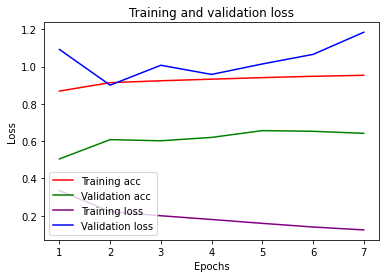

In [109]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.plot(epochs, loss, 'purple', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
# b는 "파란 실선"입니다

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## vocab_size조절 (10000> 5000)

In [110]:
#vocab_size= 5000
spm.SentencePieceTrainer.Train(
    '--input=review.txt --model_prefix=naver --vocab_size=5000')

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=review.txt --model_prefix=naver --vocab_size=5000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: review.txt
  input_format: 
  model_prefix: naver
  model_type: UNIGRAM
  vocab_size: 5000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_su

In [111]:
s = spm.SentencePieceProcessor()
s.Load('naver.model')

tokens = []

for sen in review:
    tokens.append(s.EncodeAsIds(sen))

토큰 수 평균 :  16.53963095445821
토큰 수 최대 :  104
토큰 수 표준편차:  11.649912296690662


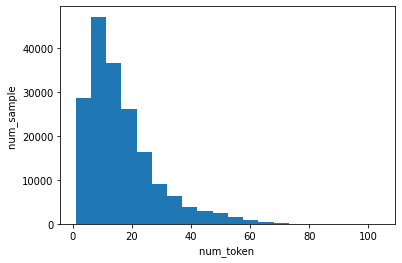

In [112]:
import matplotlib.pyplot as plt

num_token= [len(tok) for tok in tokens]
num_token = np.array(num_token)

print('토큰 수 평균 : ', np.mean(num_token))
print('토큰 수 최대 : ', np.max(num_token))
print('토큰 수 표준편차: ',np.std(num_token))
plt.hist([len(tok) for tok in tokens],bins=20)
plt.xlabel('num_token ')
plt.ylabel('num_sample ')
plt.show()

In [113]:
#임의로 45으로 지정
max_token = 45
MAX_LENGTH = int(max_token)
print('pad_sequences maxlen : ', MAX_LENGTH)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_token < max_token) / len(num_token)))

pad_sequences maxlen :  45
전체 문장의 0.9599709911010295%가 maxlen 설정값 이내에 포함됩니다. 


**이전과 비슷한 수준인 96%가 되게끔 maxlen을 45로 설정하고 진행해보자.**


In [114]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./naver.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre', maxlen=MAX_LENGTH)

    return tensor, word_index, index_word

In [115]:
tensor, word_index, index_word = sp_tokenize(s, review)

In [117]:
# test set 20% 분리
num_test = int(len(tensor)*0.2)
X_test = tensor[:num_test]   
y_test = label[:num_test]

#validation set 20%분리ㅣ
num_val = int(len(tensor)*0.4)
X_val = tensor[num_test:num_val]
y_val = label[num_test:num_val]

# test, validation set을 제외한 나머지 80%
partial_X_train = tensor[num_val:]  
partial_y_train = label[num_val:]

print(partial_X_train.shape)
print(partial_y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(110036, 45)
(110036,)
(36678, 45)
(36678,)
(36678, 45)
(36678,)


In [118]:
#모델 구성, 데이터셋 분리, 모델 학습
import tensorflow as tf
#LSTM 레이어 사용
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

vocab_size = 5000 #사용할 단어사전 크기
embedding_dim = 100 #임베딩레이어 차원 수 


model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim))
model.add(tf.keras.layers.LSTM(128)) #hidden 노드 128개
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  #이진 분류문제의 활성화함수 



from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 모델 학습

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  

checkpoint_path = os.getenv('HOME')+'/aiffel/exploration'
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) #과적합 방지를 위한 조기종료 
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor ='val_loss',mode='min',save_weights_only=True,save_best_only=True)

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    callbacks=(earlystopping,checkpoint),
                    validation_data=(X_val, y_val))

model.load_weights(checkpoint_path)



Epoch 1/20
215/215 [==============================] - 134s 614ms/step - loss: 0.3338 - accuracy: 0.8691 - val_loss: 0.7743 - val_accuracy: 0.6319
Epoch 2/20
215/215 [==============================] - 133s 617ms/step - loss: 0.2397 - accuracy: 0.9085 - val_loss: 0.8368 - val_accuracy: 0.6098
Epoch 3/20
215/215 [==============================] - 132s 614ms/step - loss: 0.2250 - accuracy: 0.9141 - val_loss: 0.9330 - val_accuracy: 0.5946
Epoch 4/20
215/215 [==============================] - 132s 616ms/step - loss: 0.2129 - accuracy: 0.9193 - val_loss: 0.9487 - val_accuracy: 0.6086
Epoch 5/20
215/215 [==============================] - 134s 622ms/step - loss: 0.1984 - accuracy: 0.9247 - val_loss: 0.8699 - val_accuracy: 0.6107
Epoch 6/20
215/215 [==============================] - 133s 619ms/step - loss: 0.1848 - accuracy: 0.9306 - val_loss: 0.8950 - val_accuracy: 0.6325
Epoch 00006: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


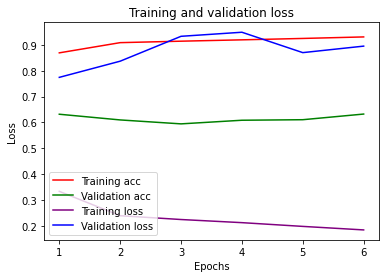

In [119]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.plot(epochs, loss, 'purple', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
# b는 "파란 실선"입니다

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Vocab의 수를 10,000 > 5,000 으로 줄이니 오히려 validation loss가 줄어들었다. 이제 이렇게 만들어진 모델을 test data를 이용하여 검증해보자.

In [120]:

results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1147/1147 - 31s - loss: 0.7744 - accuracy: 0.6362
[0.7744197845458984, 0.6362124681472778]


## 리뷰 데이터를 형태소 분석기를 통해 토큰화

In [121]:
from konlpy.tag import Mecab

mecab = Mecab()

def mecab_split(sentence):
    return mecab.morphs(sentence)



In [137]:
mecab_corpus = []

for kor in review:
    mecab_corpus.append(mecab_split(kor))
    


**이제, 각 리뷰가 형태소로 나누어져서 리스트에 담겨있다. 한 문장에 몇개의 형태소(token)으로 이루어져 있는지 분포를 확인해보자.**

토큰 수 평균 :  16.593897225615077
토큰 수 최대 :  79
토큰 수 표준편차:  11.336963242891033


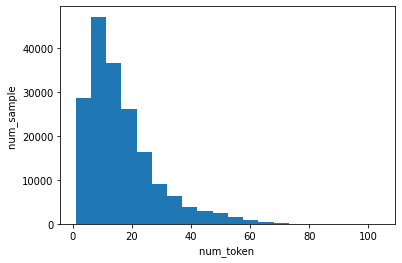

In [138]:
import matplotlib.pyplot as plt

num_token= [len(tok) for tok in mecab_corpus]
num_token = np.array(num_token)

print('토큰 수 평균 : ', np.mean(num_token))
print('토큰 수 최대 : ', np.max(num_token))
print('토큰 수 표준편차: ',np.std(num_token))
plt.hist([len(tok) for tok in tokens],bins=20)
plt.xlabel('num_token ')
plt.ylabel('num_sample ')
plt.show()

In [140]:
#임의로 45으로 지정
max_token = 45
MAX_LENGTH = int(max_token)
print('pad_sequences maxlen : ', MAX_LENGTH)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_token < max_token) / len(num_token)))

pad_sequences maxlen :  45
전체 문장의 0.9602872535334147%가 maxlen 설정값 이내에 포함됩니다. 


**이전과 비슷한 수준인 96%가 담기게끔 maxlen을 45로 설정한 후, 패딩을 진행하자**

In [143]:

mecab_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
mecab_tokenizer.fit_on_texts(mecab_corpus)

mecab_tensor = mecab_tokenizer.texts_to_sequences(mecab_corpus)

mecab_tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre',maxlen = MAX_LENGTH)



In [144]:
print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

for idx, word in enumerate(mecab_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

MeCab Vocab Size: 48479
0 : .
1 : 이
2 : 는
3 : 영화
4 : 다
5 : 고
6 : 하
7 : !
8 : 도
9 : 의
10 : 가
11 : 은


In [145]:
# test set 20% 분리
num_test = int(len(mecab_tensor)*0.2)
X_test = mecab_tensor[:num_test]   
y_test = label[:num_test]

#validation set 20%분리ㅣ
num_val = int(len(mecab_tensor)*0.4)
X_val = mecab_tensor[num_test:num_val]
y_val = label[num_test:num_val]

# test, validation set을 제외한 나머지 80%
partial_X_train = mecab_tensor[num_val:]  
partial_y_train = label[num_val:]

print(partial_X_train.shape)
print(partial_y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(110036, 45)
(110036,)
(36678, 45)
(36678,)
(36678, 45)
(36678,)


In [146]:
#모델 구성, 데이터셋 분리, 모델 학습
import tensorflow as tf
#LSTM 레이어 사용
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

vocab_size = 5000 #사용할 단어사전 크기
embedding_dim = 100 #임베딩레이어 차원 수 


model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim))
model.add(tf.keras.layers.LSTM(128)) #hidden 노드 128개
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  #이진 분류문제의 활성화함수 



from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 모델 학습

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  

checkpoint_path = os.getenv('HOME')+'/aiffel/exploration'
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) #과적합 방지를 위한 조기종료 
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor ='val_loss',mode='min',save_weights_only=True,save_best_only=True)

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    callbacks=(earlystopping,checkpoint),
                    validation_data=(X_val, y_val))

model.load_weights(checkpoint_path)



Epoch 1/20
215/215 [==============================] - 133s 611ms/step - loss: 0.3337 - accuracy: 0.8701 - val_loss: 1.0253 - val_accuracy: 0.5313
Epoch 2/20
215/215 [==============================] - 131s 611ms/step - loss: 0.2393 - accuracy: 0.9089 - val_loss: 0.8483 - val_accuracy: 0.6009
Epoch 3/20
215/215 [==============================] - 131s 611ms/step - loss: 0.2255 - accuracy: 0.9147 - val_loss: 0.8263 - val_accuracy: 0.6156
Epoch 4/20
215/215 [==============================] - 131s 609ms/step - loss: 0.2136 - accuracy: 0.9191 - val_loss: 0.8598 - val_accuracy: 0.6187
Epoch 5/20
215/215 [==============================] - 132s 612ms/step - loss: 0.2002 - accuracy: 0.9242 - val_loss: 0.9493 - val_accuracy: 0.6128
Epoch 6/20
215/215 [==============================] - 131s 611ms/step - loss: 0.1870 - accuracy: 0.9298 - val_loss: 1.0509 - val_accuracy: 0.6128
Epoch 7/20
215/215 [==============================] - 131s 611ms/step - loss: 0.1750 - accuracy: 0.9342 - val_loss: 1.1687 -

In [147]:

results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1147/1147 - 30s - loss: 0.8291 - accuracy: 0.6147
[0.8290737271308899, 0.6147009134292603]


# 회고

이번 노드에서는 센텐스피스 및 형태소 분석기를 통한 토큰화를 진행해보고, 네이버 영화리뷰의 감정분석을 해보았다.
결론적으로, 저번 노드에서 진행한 토큰화 및 감정분석보다는 성능이 두 토큰화 방법 모두 좋지 않았다.
세번의 모델 학습 모두 LSTM 레이어의 수와 노드는 동일하게 진행하였음에도 불구하고, 토큰화 방법에 따라 accuracy가 10%정도나 차이나는것으로 보아 NLP에서
모델에 들어가기 전까지의 과정(토큰화, 임베딩)이 얼마나 중요한지 이번 노드를 통해 배울 수 있었다.

이번노드를 진행하면서 아쉬웠던점은 모델 학습 및 전처리과정이 조금 복잡했는데, 함수로 구현해서 진행하였으면 더 보기도 쉽고 깔끔하게 노드를 진행했을텐데 하는 점이다. 또한 NLP노드를 진행하면서 토큰화부터 다시 처음부터 공부하고 있는데, 아직은 그 수학적 배경이나 동작원리가 완전히 이해되지는 않아서 토큰화를 하는 방법에는 이런게 있구나,, 하고 넘어가는 수준으로 노드를 진행하였다. 고잉 디퍼 과정을 시작한 만큼 작동원리에 대해 완전히 알고 넘어가도록 공부해보자.